## Intrduction to Convolutional Neural Network and Computer Vision with Tensor Flow

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import zipfile
import wget
import os
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Downloading Dataset

In [4]:
wget.download('https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip')
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

100% [......................................................................] 109540975 / 109540975

In [5]:
import os
for dirpath,ddirnames,filenames in os.walk('pizza_steak'):
    print(dirpath,len(ddirnames),len(filenames))

pizza_steak 4 0
pizza_steak\.ipynb_checkpoints 0 0
pizza_steak\predict 0 1
pizza_steak\test 2 0
pizza_steak\test\pizza 0 250
pizza_steak\test\steak 0 250
pizza_steak\train 2 0
pizza_steak\train\pizza 1 750
pizza_steak\train\pizza\.ipynb_checkpoints 0 5
pizza_steak\train\steak 1 750
pizza_steak\train\steak\.ipynb_checkpoints 0 2


### Data Visualization

In [7]:
import os
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
    target_path = os.path.join(target_dir,target_class)    
    
    if os.path.exists(target_path):        
        random_image_path = os.path.join(target_path,random.sample(os.listdir(target_path),1)[0])
        img = mpimg.imread(random_image_path)
        plt.title(target_class)
        plt.imshow(img)
        plt.axis('off')
        print(f'Image Shape : {img.shape}')
        return img
    else: 
        print('Error : ',target_path,' path does not exist')
        return None

Image Shape : (512, 512, 3)


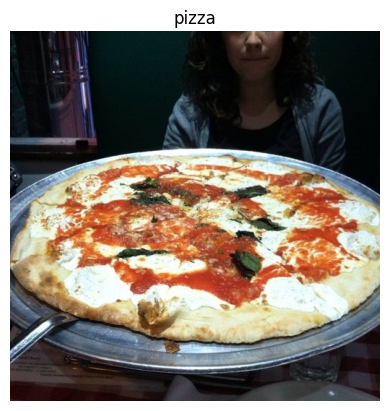

In [8]:
i = view_random_image('pizza_steak/train','pizza')

### Preprocessing and scaling of data using ImageDataGenerator
- ImageDataGenerator -> Genrate batches of tensor image data with real time Data augumentation
- a batch is small small subset rather than looking 10k images model might look at 32 to avoid memory issue

In [9]:
tf.random.set_seed(32)
train_data_gen = ImageDataGenerator(rescale=1./255)
valid_data_gen = ImageDataGenerator(rescale=1./255)

# flow_from_dataframe to load images from dataframe
train_data = train_data_gen.flow_from_directory(directory='pizza_steak/train',batch_size=32,target_size=(224,224),class_mode='binary',seed=32)
valid_data = valid_data_gen.flow_from_directory(directory='pizza_steak/test', batch_size=32,target_size=(224,224),class_mode='binary',seed=32)


Found 1507 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [10]:
len(train_data),len(valid_data)


(48, 16)

In [ ]:
type(train_data),type(train_data[0]),type(train_data[0][0])
images,labels = train_data[0],train_data[1]
len(images[0]),len(images[1])
print(images[1][0].shape)
plt.imshow(images[0][0])


### Build & Compile base model

- Filters - Siding window over image , higher means more complex model (check at https://poloclub.github.io/cnn-explainer/)
- Padding - same to preserve the input shape or it will add extra blank pixel at border

In [11]:
model_cnn_base = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(224,224,3),padding='same'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_cnn_base.compile(loss=tf.keras.losses.BinaryCrossentropy,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])

D:\Workshops\Python_Worksop\env_data_science\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model_cnn_base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 222, 222, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 484000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         484,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 486,101 (1.85 MB)

 Trainable params: 486,101 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
hist_cnn_base = model_cnn_base.fit(train_data,epochs=5,steps_per_epoch=47,validation_data=valid_data,validation_steps=47)

Epoch 1/5


D:\Workshops\Python_Worksop\env_data_science\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.6025 - loss: 1.7113 - val_accuracy: 0.7620 - val_loss: 0.4973
Epoch 2/5


C:\Users\Swara\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - accuracy: 0.6562 - loss: 0.5171 - val_accuracy: 0.8020 - val_loss: 0.4677
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.8097 - loss: 0.4220 - val_accuracy: 0.8300 - val_loss: 0.3803
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.7812 - loss: 0.3576 - val_accuracy: 0.8460 - val_loss: 0.3766
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.8778 - loss: 0.3068 - val_accuracy: 0.8620 - val_loss: 0.3733


<Axes: title={'center': 'CNN Result - Base Model'}>

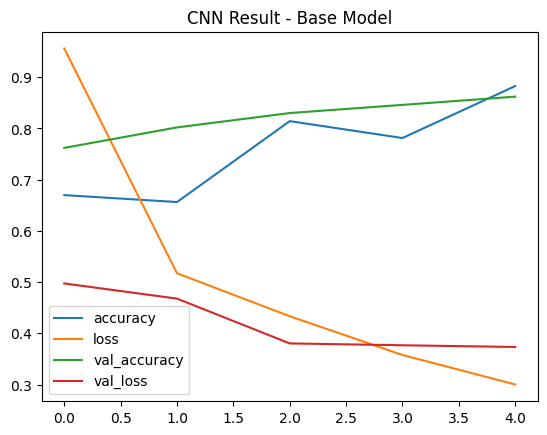

In [14]:
pd.DataFrame(hist_cnn_base.history).plot(title= 'CNN Result - Base Model')

<Axes: title={'center': 'CNN Base Model - Loss'}>

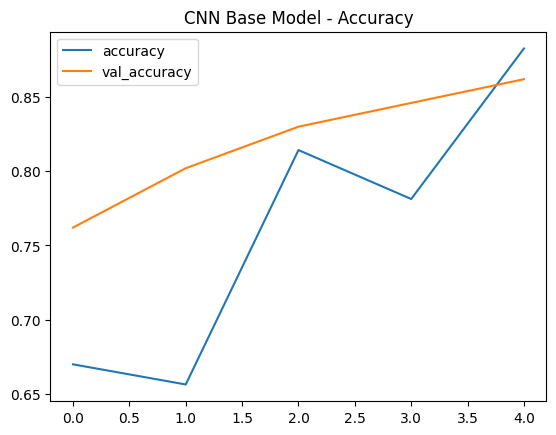

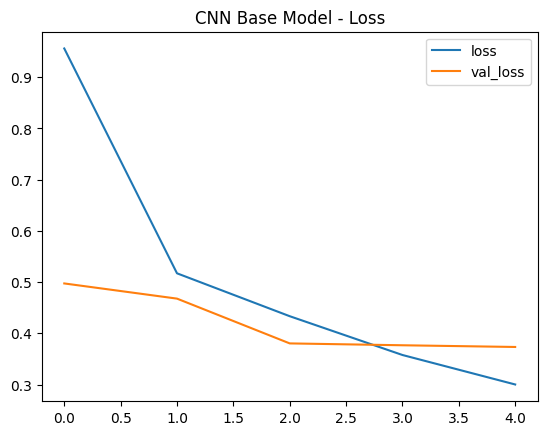

In [15]:
# Plotting graph separatly
df_eval_base = pd.DataFrame(hist_cnn_base.history)
df_eval_base_accurracy = df_eval_base[['accuracy','val_accuracy']]
df_eval_base_loss = df_eval_base[['loss','val_loss']]
df_eval_base_accurracy.plot(title= 'CNN Base Model - Accuracy')
df_eval_base_loss.plot(title= 'CNN Base Model - Loss')

#### Model is overfitting when you can see value of loss is decreasing, this can be indeuced due to following reason
- increase the no. of Conv Layer
- increase the no. of Conv Filters
- add another dense layer to the o/p of flattened layer
#### Overfitting can be reduced 
- add data augumentation
- add regularization layers
- add more data
#### New Model to reduce overfitting

In [16]:
# Max pooling condensing the input by max value to find best possible o/p
model_cnn_v1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_cnn_v1.compile(loss=tf.keras.losses.BinaryCrossentropy,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])

D:\Workshops\Python_Worksop\env_data_science\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
hist_cnn_v1 = model_cnn_v1.fit(train_data,epochs=5,steps_per_epoch=47,validation_data=valid_data,validation_steps=47)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5780 - loss: 0.6582 - val_accuracy: 0.7080 - val_loss: 0.5352
Epoch 2/5


C:\Users\Swara\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 348ms/step - accuracy: 0.8438 - loss: 0.4228 - val_accuracy: 0.7640 - val_loss: 0.4935
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.7651 - loss: 0.5020 - val_accuracy: 0.8200 - val_loss: 0.3865
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.7812 - loss: 0.3586 - val_accuracy: 0.8360 - val_loss: 0.3803
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 47s 915ms/step - accuracy: 0.7893 - loss: 0.4358 - val_accuracy: 0.8420 - val_loss: 0.3619


In [18]:
model_cnn_v1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

<Axes: title={'center': 'CNN Base Model - Loss'}>

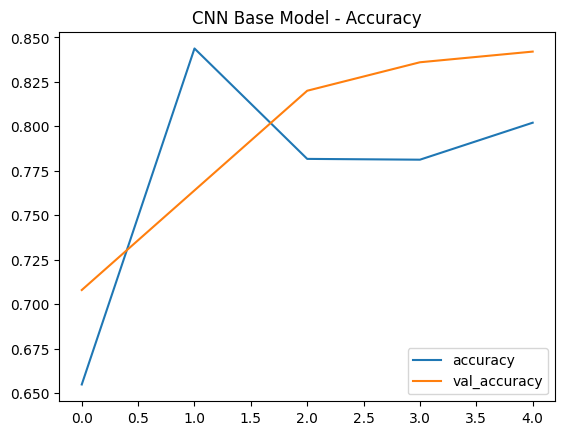

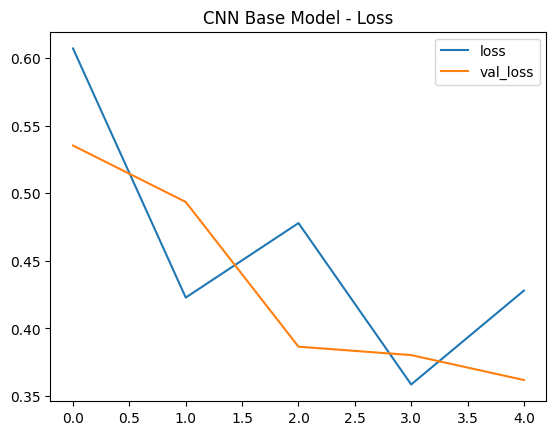

In [19]:
# Plotting graph separatly
df_eval_v1 = pd.DataFrame(hist_cnn_v1.history)
df_eval_v1_accurracy = df_eval_v1[['accuracy','val_accuracy']]
df_eval_v1_loss = df_eval_v1[['loss','val_loss']]
df_eval_v1_accurracy.plot(title= 'CNN Base Model - Accuracy')
df_eval_v1_loss.plot(title= 'CNN Base Model - Loss')

In [20]:
#### Data Augmentation

In [21]:
tf.random.set_seed(32)
train_data_gen_augmented = ImageDataGenerator(rescale=1./255,
                                              rotation_range=0.2,
                                              shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)
train_data_gen_nonaug = ImageDataGenerator(rescale=1./255)
valid_data_gen_nonaug = ImageDataGenerator(rescale=1./255)


# flow_from_dataframe to load images from dataframe
train_data_augmented = train_data_gen_augmented.flow_from_directory(directory='pizza_steak/train',batch_size=32,target_size=(224,224),class_mode='binary',seed=32,shuffle=False)
train_data_nonaug = train_data_gen_nonaug.flow_from_directory(directory='pizza_steak/train',batch_size=32,target_size=(224,224),class_mode='binary',seed=32,shuffle=False)
valid_data_nonaug = valid_data_gen_nonaug.flow_from_directory(directory='pizza_steak/test', batch_size=32,target_size=(224,224),class_mode='binary',seed=32,shuffle=False)
train_data_augmented_shuffle = train_data_gen_augmented.flow_from_directory(directory='pizza_steak/train',batch_size=32,target_size=(224,224),class_mode='binary',seed=32,shuffle=True)


Found 1507 images belonging to 2 classes.
Found 1507 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 1507 images belonging to 2 classes.


(224, 224, 3)

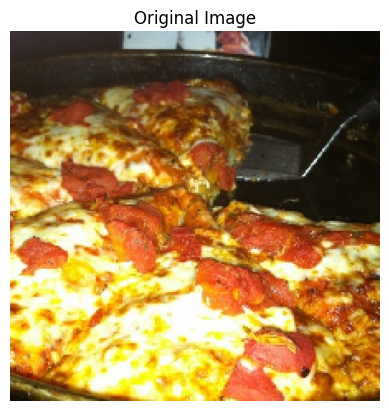

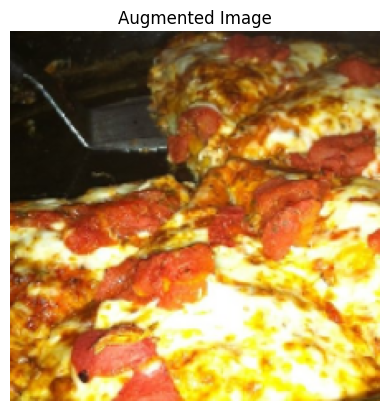

<Figure size 640x480 with 0 Axes>

In [22]:
import random
random_num = random.randint(0,32)
images,labels = train_data_nonaug[0]
images_aug,labels_aug = train_data_augmented[0]
# Orginal Image
plt.imshow(images[random_num])
plt.title('Original Image')
plt.axis(False)
plt.figure()
# Augmented Image
plt.imshow(images_aug[random_num])
plt.title('Augmented Image')
plt.axis(False)
plt.figure()

images[random_num].shape

In [23]:
# Max pooling condensing the input by max value to find best possible o/p
model_cnn_v2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_cnn_v2.compile(loss=tf.keras.losses.BinaryCrossentropy,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])

D:\Workshops\Python_Worksop\env_data_science\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
hist_cnn_v2 = model_cnn_v2.fit(train_data_augmented,epochs=5,
                               steps_per_epoch=47,
                               validation_data=valid_data,
                               validation_steps=47)

Epoch 1/5


D:\Workshops\Python_Worksop\env_data_science\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.5376 - loss: 0.9034 - val_accuracy: 0.5080 - val_loss: 0.6743
Epoch 2/5


C:\Users\Swara\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.0000e+00 - loss: 0.8488 - val_accuracy: 0.5020 - val_loss: 0.6786
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 759ms/step - accuracy: 0.3882 - loss: 0.7395 - val_accuracy: 0.6300 - val_loss: 0.6842
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.5312 - loss: 0.6943 - val_accuracy: 0.6280 - val_loss: 0.6843
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 828ms/step - accuracy: 0.5258 - loss: 0.6890 - val_accuracy: 0.6840 - val_loss: 0.6598


<Axes: title={'center': 'CNN Base Model - Loss'}>

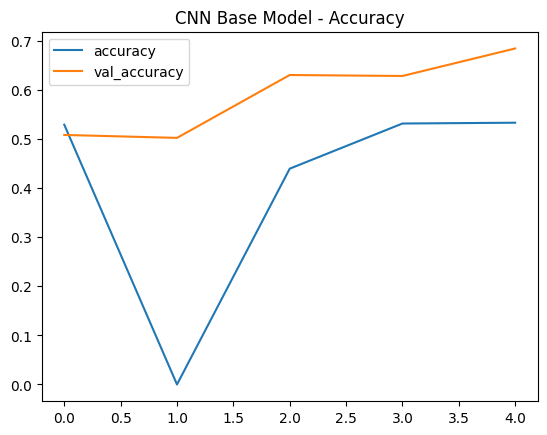

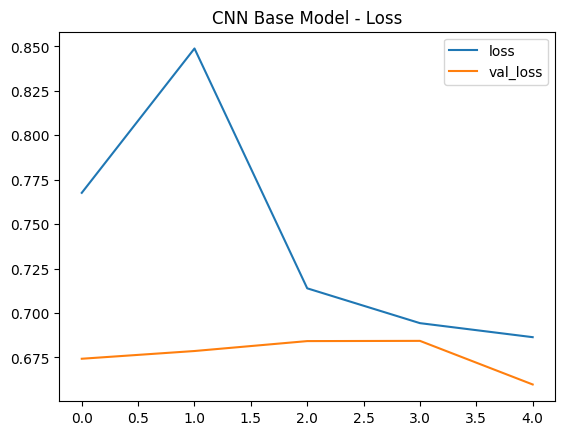

In [25]:
# Plotting graph separatly
df_eval_v2 = pd.DataFrame(hist_cnn_v2.history)
df_eval_v2_accurracy = df_eval_v2[['accuracy','val_accuracy']]
df_eval_v2_loss = df_eval_v2[['loss','val_loss']]
df_eval_v2_accurracy.plot(title= 'CNN Base Model - Accuracy')
df_eval_v2_loss.plot(title= 'CNN Base Model - Loss')

In [26]:
# Max pooling condensing the input by max value to find best possible o/p
model_cnn_v3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_cnn_v3.compile(loss=tf.keras.losses.BinaryCrossentropy,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])


D:\Workshops\Python_Worksop\env_data_science\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
hist_cnn_v3 = model_cnn_v3.fit(train_data_augmented_shuffle,epochs=5,
                               steps_per_epoch=47,
                               validation_data=valid_data,
                               validation_steps=47)

Epoch 1/5


D:\Workshops\Python_Worksop\env_data_science\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.5629 - loss: 0.6766 - val_accuracy: 0.6580 - val_loss: 0.5987
Epoch 2/5


C:\Users\Swara\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.6562 - loss: 0.5722 - val_accuracy: 0.6760 - val_loss: 0.5747
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.6983 - loss: 0.5702 - val_accuracy: 0.8080 - val_loss: 0.4157
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.6875 - loss: 0.6451 - val_accuracy: 0.8200 - val_loss: 0.4164
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.7811 - loss: 0.4831 - val_accuracy: 0.8400 - val_loss: 0.3586


In [ ]:
# Plotting graph separatly
df_eval_v3 = pd.DataFrame(hist_cnn_v3.history)
df_eval_v3_accurracy = df_eval_v3[['accuracy','val_accuracy']]
df_eval_v3_loss = df_eval_v3[['loss','val_loss']]
df_eval_v3_accurracy.plot(title= 'CNN Base Model - Accuracy')
df_eval_v3_loss.plot(title= 'CNN Base Model - Loss')

### Making Predictions
- https://github.com/mrdbourke/tensorflow-deep-learning/

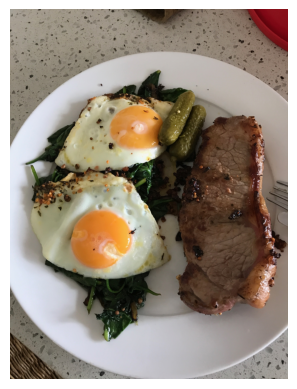

In [28]:
pred_steak = mpimg.imread('pizza_steak/predict/03-steak.jpeg')
plt.axis(False)
plt.imshow(pred_steak)


In [29]:
pred_steak.shape

(4032, 3024, 3)

In [36]:
def load_and_prep_image(file_name,img_shape=224):
    img = tf.io.read_file(file_name)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img,size=[img_shape,img_shape])
    img = img/255
    return img

(224, 224, 3)


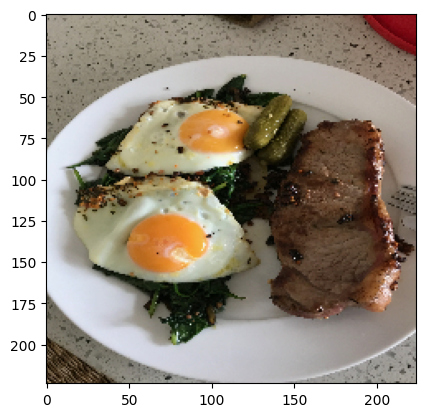

In [37]:
pred_steak_adjst = load_and_prep_image('pizza_steak/predict/03-steak.jpeg')
print(pred_steak_adjst.shape)
plt.imshow(pred_steak_adjst)

In [39]:
pred_steak_adjst.shape

TensorShape([224, 224, 3])

In [42]:
model_cnn_base.predict(tf.expand_dims(pred_steak_adjst,axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


array([[0.82954216]], dtype=float32)